# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale

from skimage.morphology import disk
from skimage.morphology import dilation
from skimage.morphology import erosion, opening, closing

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

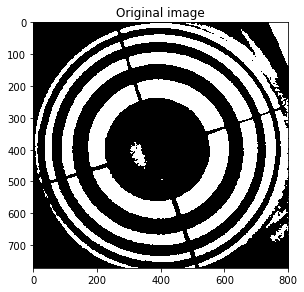

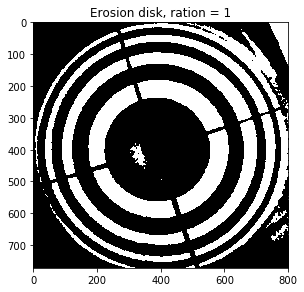

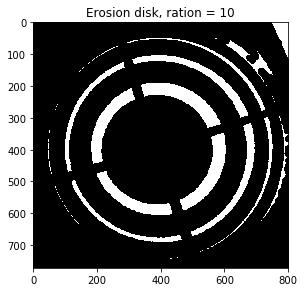

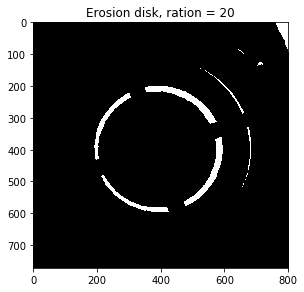

In [2]:
path  = "./images/"
radii = [1, 10, 20]

img_coins = io.imread(path + "FindingContours.png", as_grey = True)

io.imshow(img_coins)
plt.title("Original image")
plt.show()

for r in radii:
    img_temp = erosion(img_coins, disk(r))
    io.imshow(img_temp)
    plt.title("Erosion disk, ration = {0}".format(r))
    plt.show()

** Q.1.2 Dilation **

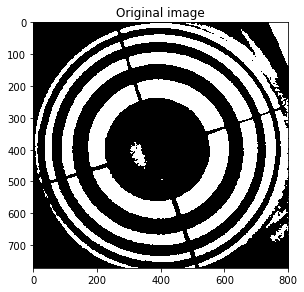

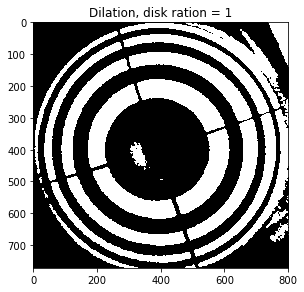

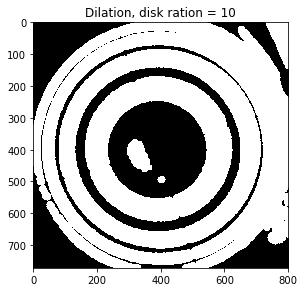

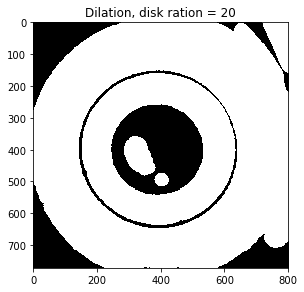

In [3]:
io.imshow(img_coins)
plt.title("Original image")
plt.show()

for r in radii:
    img_temp = dilation(img_coins, disk(r))
    io.imshow(img_temp)
    plt.title("Dilation, disk ration = {0}".format(r))
    plt.show()

** Q.1.3 Opening **

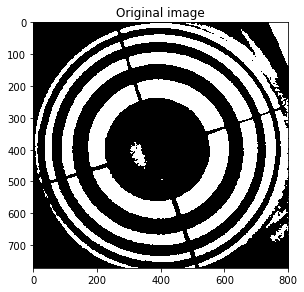

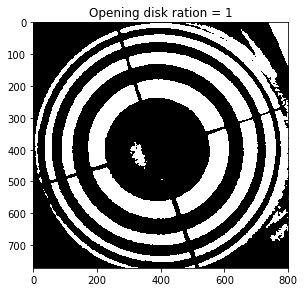

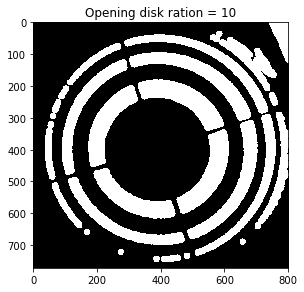

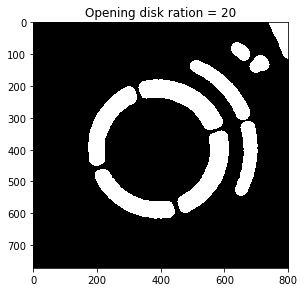

In [4]:
io.imshow(img_coins)
plt.title("Original image")
plt.show()

for r in radii:
    img_temp = opening(img_coins, disk(r))
    io.imshow(img_temp)
    plt.title("Opening disk ration = {0}".format(r))
    plt.show()

** Q.1.4 Closing**

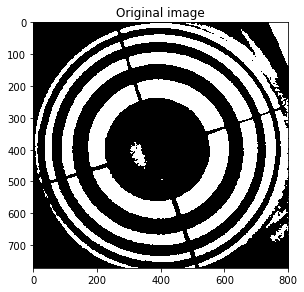

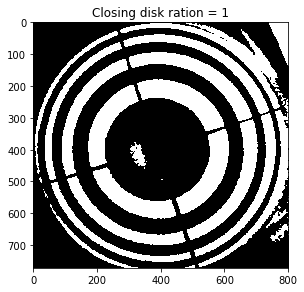

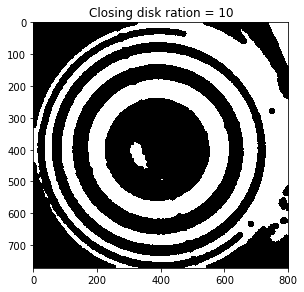

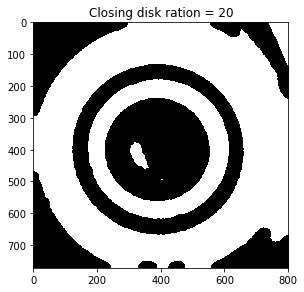

In [5]:
io.imshow(img_coins)
plt.title("Original image")
plt.show()

for r in radii:
    img_temp = closing(img_coins, disk(r))
    io.imshow(img_temp)
    plt.title("Closing disk ration = {0}".format(r))
    plt.show()

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

Dilation thickens the bright object, using specified selem. Morphological dilation sets a pixel at (i,j) to the maximum over all pixels in the neighborhood centered at (i,j). Dilation enlarges bright regions and shrinks dark regions.

Erosion shrinks the bright object, using specified selem. Morphological erosion sets a pixel at (i,j) to the minimum over all pixels in the neighborhood centered at (i,j). Erosion shrinks bright regions and enlarges dark regions.

Opening is defined as erision followed by dilation. Opening can remove small bright spots and connect small dark cracks. This tends to “open” up (dark) gaps between (bright) features.

Closing is defined as dilation followed by erosion. Closing can remove small dark spots and connect small bright cracks. This tends to “close” up (dark) gaps between (bright) features.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


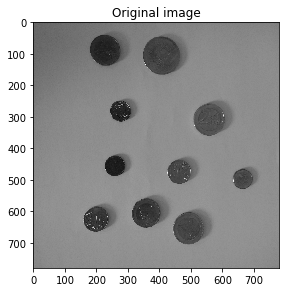

In [6]:
img_coins = img_as_ubyte(rescale(io.imread(path + "coins.jpg", as_grey = True), 1/4, mode="constant"))

io.imshow(img_coins)
plt.title("Original image")
plt.show()

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

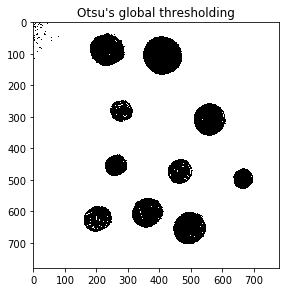

In [7]:
from skimage import filters as fls

thr_coins = fls.threshold_otsu(img_coins)
img_coins_otsu = img_coins >= thr_coins

io.imshow(img_coins_otsu)
plt.title("Otsu's global thresholding")
plt.show()

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

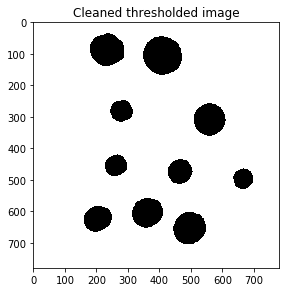

In [8]:
img_coins_otsu = opening(img_coins_otsu, disk(2))
img_coins_otsu = closing(img_coins_otsu, disk(10))

io.imshow(img_coins_otsu)
plt.title("Cleaned thresholded image")
plt.show()

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


The number of regions is: 10
The radius of the region is 53 pxs
The area of the region is 8921 pxs
The radius of the region is 61 pxs
The area of the region is 11989 pxs
The radius of the region is 35 pxs
The area of the region is 3903 pxs
The radius of the region is 51 pxs
The area of the region is 8170 pxs
The radius of the region is 35 pxs
The area of the region is 3828 pxs
The radius of the region is 39 pxs
The area of the region is 4866 pxs
The radius of the region is 32 pxs
The area of the region is 3250 pxs
The radius of the region is 48 pxs
The area of the region is 7351 pxs
The radius of the region is 43 pxs
The area of the region is 5772 pxs
The radius of the region is 51 pxs
The area of the region is 8416 pxs


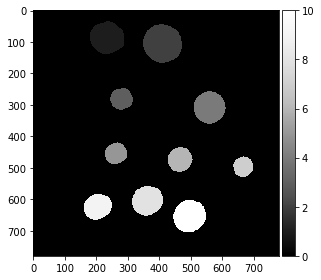

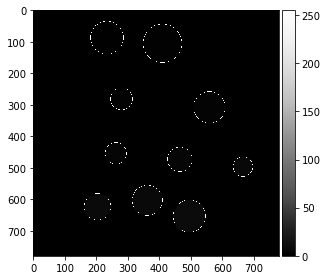

In [9]:
from skimage.measure import label, regionprops
from skimage.draw import circle_perimeter

img_label = label(img_coins_otsu, background = 1)
regions = regionprops(img_label)

io.imshow(img_label, cmap = plt.cm.Greys_r)

print("The number of regions is: {}".format(len(regions)))

for idx_region, region in enumerate(regions):
#     if idx_region == 0:
#         continue
    
    radius = region.equivalent_diameter/2
    print("The radius of the region is {:.0f} pxs".format(radius))
    print("The area of the region is {:.0f} pxs".format(region.convex_area))
    circle_coord = circle_perimeter(int(region.centroid[0]), int(region.centroid[1]), int(radius))
    img_label[circle_coord[0], circle_coord[1]] = 255
    
plt.figure()
io.imshow(img_label, cmap = plt.cm.Greys_r)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


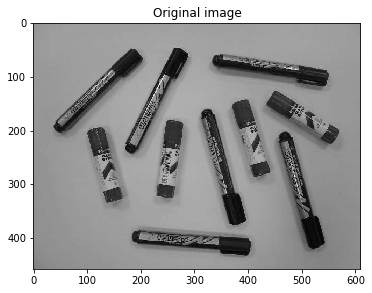

In [10]:
img_obj = img_as_ubyte(io.imread(path + "objets4.jpg", as_grey = True))

io.imshow(img_obj)
plt.title("Original image")
plt.show()

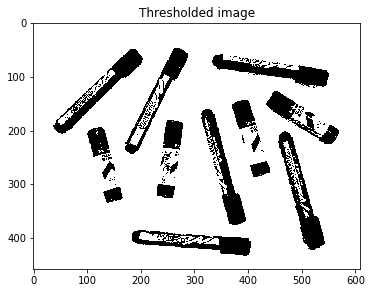

In [11]:
thr_obj = fls.threshold_otsu(img_obj)
img_obj = img_obj >= thr_obj

io.imshow(img_obj)
plt.title("Thresholded image")
plt.show()

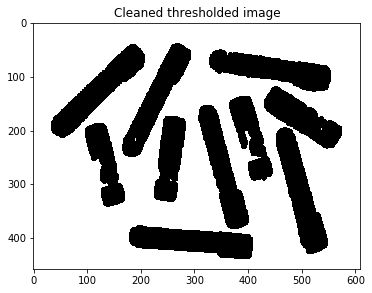

In [12]:
from skimage.morphology import rectangle
img_obj_th = erosion(img_obj, rectangle(10, 5))
img_obj_th = erosion(img_obj_th, disk(3))

io.imshow(img_obj_th, cmap = plt.cm.Greys_r)
plt.title("Cleaned thresholded image")
plt.show()

/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


The total number of objects is 10
The number of glue sticks is 4
The number of markers is 6


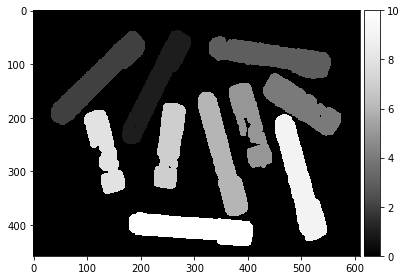

In [29]:
import numpy as np

img_obj_label = label(img_obj_th, background = 1)
regions = regionprops(img_obj_label)

io.imshow(img_obj_label, cmap = plt.cm.Greys_r)

region_areas = np.array([region.convex_area for region in regions])
region_areas_dev = region_areas - region_areas.mean()

print("The total number of objects is {}".format(len(regions)))
print("The number of glue sticks is {}".format(len(np.where(region_areas_dev < 0)[0])))
print("The number of markers is {}".format(len(np.where(region_areas_dev >= 0)[0])))